## DATA LOADING AND CREATING THE LAYERS

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
# image size is 256 * 256 
# batch size is of 32 images

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
# load dataset in this give the batch size and the image size and the potatovillage is the 
# name of folder where all folder are stored ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potatovillage",
     shuffle = True,
     image_size = (IMAGE_SIZE,IMAGE_SIZE),
     batch_size = BATCH_SIZE
)

Found 2148 files belonging to 3 classes.


In [4]:
# dataset.class_names will show us the name of the all folders that are stored in the folder name potatovillage

class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
 # len(dataset) give the total batch no.
len(dataset)

68

In [6]:
# apply itratin on dataset [1] and then print the shape of 
# the batch and then print the label that is given to the batch


for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 2 0 0 2 0 0 1 0 1 1]


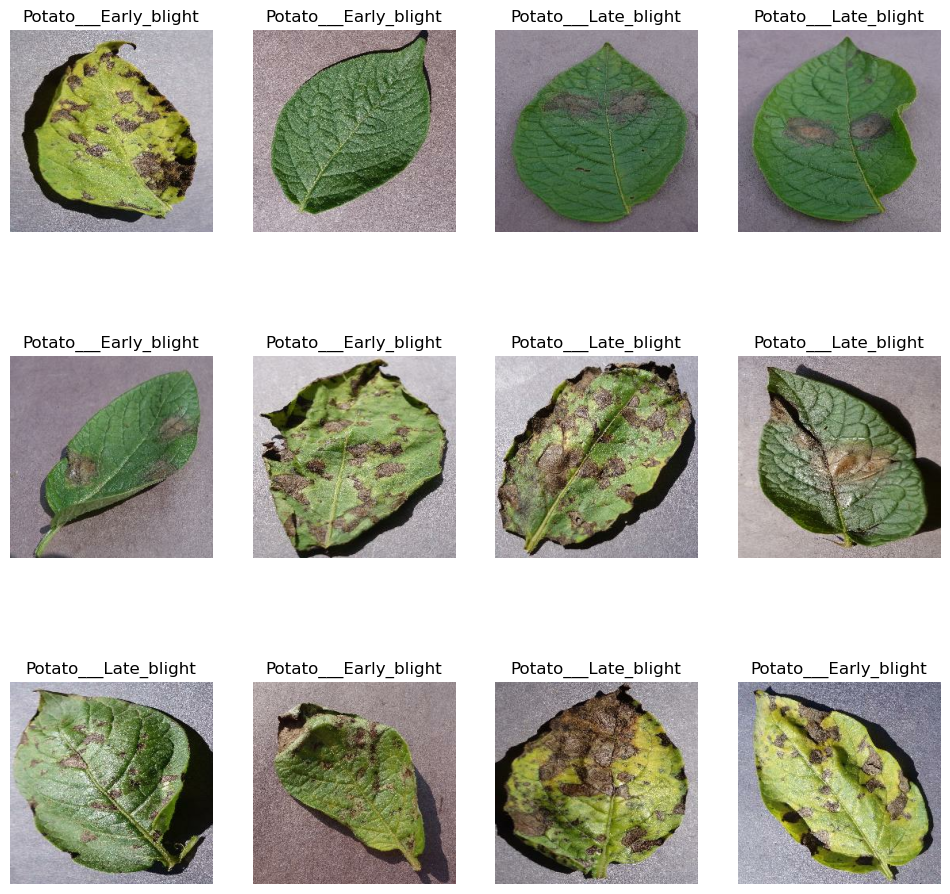

In [7]:
# again same did but in this print the image 
plt.figure(figsize = (12,12))
for image_batch,lable_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])  # this will give us the label to the image that is the name of the folder


In [8]:
# 80% ==> training
# 20% ==> 10% validation ,10% test

In [9]:
# DIVIDE DATASET IN TRAIN DATASET IS 80%
train_size = 0.8
len(dataset)*train_size  

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)* val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
# Creating the FUNCTION for the taking dataset and convert it into the train, test, validation dataset

def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
get_dataset_partition_tf(dataset)

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
# this will optimized the data to improve the training performance

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [21]:
# WHEN THERE IS NEW INPUT COME THAT TIME IF THE IMAGE NOT IN 256 * 256 THEN IT WILL CONVERT THE IMG INTO THE 256 * 256  

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
# THIS LAYER WILL ROTATE THE IMAGE AND GENRATE THE NEW DATA FOR THE TRAINING 
# THIS IS CALLED AS THE DATA AUGMENTATION

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

## --------------------------------------------------------------------------------------

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size = (3,3),activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)



Epoch 1/10
54/54 [==============================] - 118s 2s/step - loss: 0.9062 - accuracy: 0.4809 - val_loss: 0.8587 - val_accuracy: 0.4479
Epoch 2/10
54/54 [==============================] - 87s 2s/step - loss: 0.6757 - accuracy: 0.6777 - val_loss: 0.5635 - val_accuracy: 0.7604
Epoch 3/10
54/54 [==============================] - 89s 2s/step - loss: 0.3634 - accuracy: 0.8438 - val_loss: 0.2874 - val_accuracy: 0.8958
Epoch 4/10
54/54 [==============================] - 93s 2s/step - loss: 0.2867 - accuracy: 0.8825 - val_loss: 0.3136 - val_accuracy: 0.8802
Epoch 5/10
13/54 [======>.......................] - ETA: 1:06 - loss: 0.1587 - accuracy: 0.9327